<a href="https://colab.research.google.com/github/dr-mushtaq/Python-Notes/blob/master/Model_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Table of Content**</p>



*   ExplainerDashboard
*   Shap



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**1-ExplainerDashboard**</p>

In [ ]:
pip install explainerdashboard


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard # This import should work now
import pandas as pd # Import pandas
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Convert X_train and X_test to Pandas DataFrames with column names
X_train = pd.DataFrame(X_train, columns=feature_names) # Convert to DataFrame
X_test = pd.DataFrame(X_test, columns=feature_names) # Convert to DataFrame
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
explainer = ClassifierExplainer(model, X_test, y_test)
ExplainerDashboard(explainer).run()

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(

<IPython.core.display.Javascript object>

Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**2-SHAP**</p>

In [ ]:
pip install shap


In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

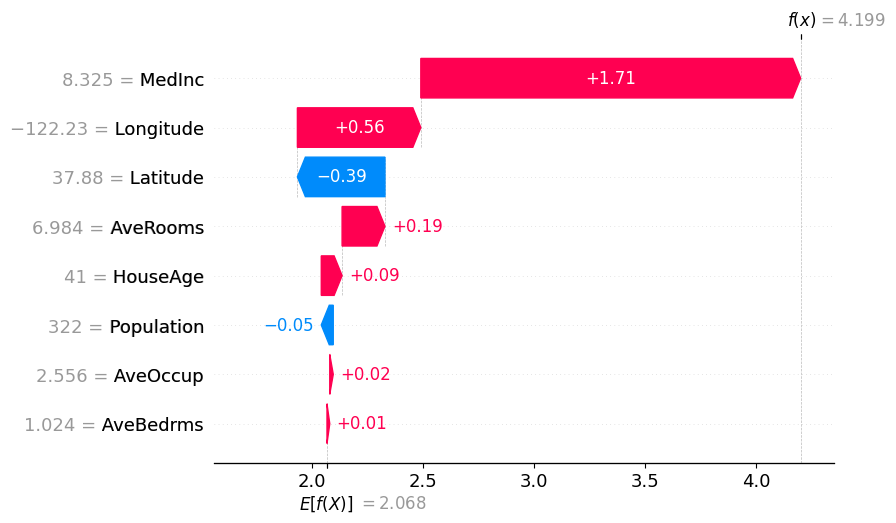

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()


In [ ]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [ ]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

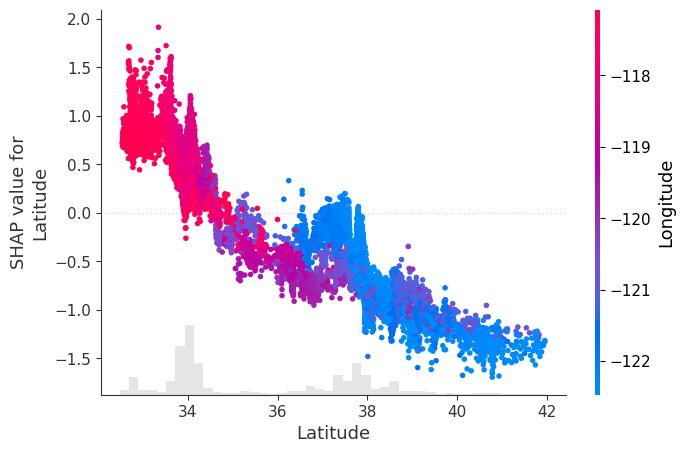

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

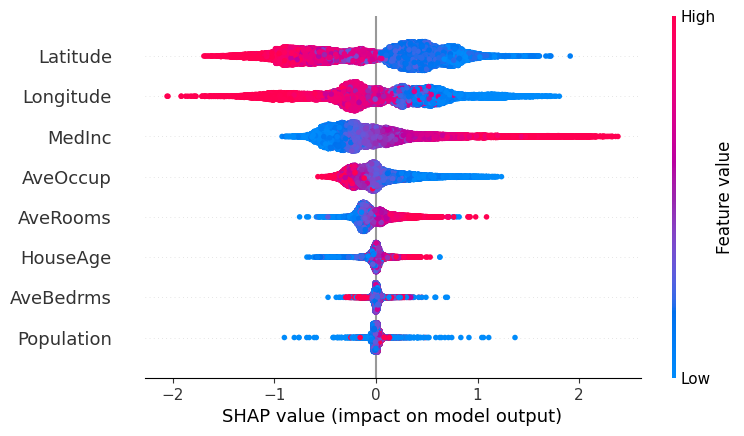

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

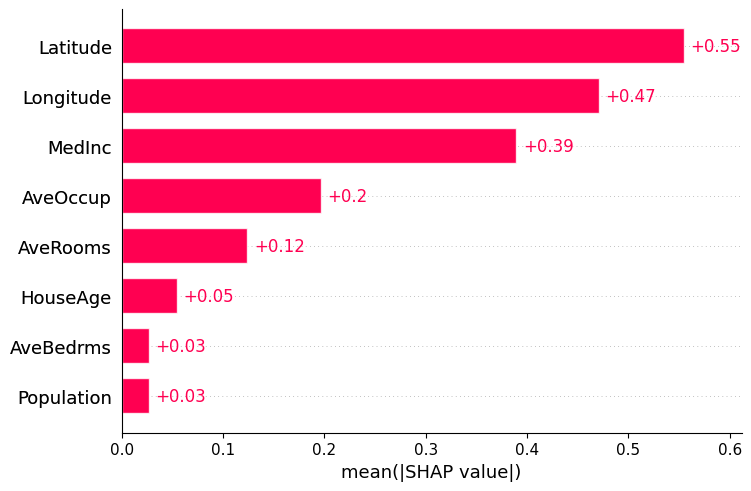

In [ ]:
shap.plots.bar(shap_values)


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**3-InterpretML**</p>

In [ ]:
!pip install interpret

In [10]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from interpret.glassbox import LogisticRegression as InterpretableLR
from interpret import show

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an interpretable logistic regression model
interpretable_lr = InterpretableLR(random_state=42)
interpretable_lr.fit(X_train, y_train)

# Model performance
accuracy = interpretable_lr.score(X_test, y_test)
print(f"Interpretable Logistic Regression Test Accuracy: {accuracy:.2f}")

# Global explanation: Feature importance
global_explanation = interpretable_lr.explain_global(name="Breast Cancer Feature Importance")
show(global_explanation)

# Local explanation for a single prediction
sample_idx = 5  # Change this index to analyze different samples
local_explanation = interpretable_lr.explain_local(X_test[sample_idx:sample_idx+1], y_test[sample_idx:sample_idx+1])
show(local_explanation)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Interpretable Logistic Regression Test Accuracy: 0.97
